In [ ]:
#@title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

In [1]:
import csv
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout, Conv2D
from keras import regularizers
from keras.utils import np_utils
from google.colab import files

The data for this exercise is available at: https://www.kaggle.com/datamunge/sign-language-mnist/home

Sign up and download to find 2 CSV files: sign_mnist_test.csv and sign_mnist_train.csv -- You will upload both of them using this button before you can continue.


In [2]:
uploaded=files.upload()

Saving sign_mnist_test.csv to sign_mnist_test.csv
Saving sign_mnist_train.csv to sign_mnist_train.csv


In [ ]:
def get_data(filename):
  # You will need to write code that will read the file passed
  # into this function. The first line contains the column headers
  # so you should ignore it
  # Each successive line contians 785 comma separated values between 0 and 255
  # The first value is the label
  # The rest are the pixel values for that picture
  # The function will return 2 np.array types. One with all the labels
  # One with all the images
  #
  # Tips: 
  # If you read a full line (as 'row') then row[0] has the label
  # and row[1:785] has the 784 pixel values
  # Take a look at np.array_split to turn the 784 pixels into 28x28
  # You are reading in strings, but need the values to be floats
  # Check out np.array().astype for a conversion
    with open(filename) as training_file:
      # Your code starts here
      # Your code ends here
    return images, labels


training_images, training_labels = get_data('sign_mnist_train.csv')
testing_images, testing_labels = get_data('sign_mnist_test.csv')

# Keep these
print(training_images.shape)
print(training_labels.shape)
print(testing_images.shape)
print(testing_labels.shape)

# Their output should be:
# (27455, 28, 28)
# (27455,)
# (7172, 28, 28)
# (7172,)

In [3]:
import pandas as pd
from sklearn.utils import shuffle

In [4]:
training_images = pd.read_csv('sign_mnist_train.csv')
label = training_images['label']
training_labels = training_images['label'].values
training_images.drop(['label'], inplace=True, axis=1)
training_images = training_images.values

testing_images = pd.read_csv('sign_mnist_test.csv')
testing_labels = testing_images['label'].values
testing_images.drop(['label'], inplace=True, axis=1)
testing_images = testing_images.values

training_images, training_labels = shuffle(training_images, label, random_state=0)

In [5]:
print(training_images.shape)
print(training_labels.shape)
print(len(np.unique(training_labels)))
training_images = training_images.reshape(-1, 28, 28).astype('float32')
print(training_images.shape)

(27455, 784)
(27455,)
24
(27455, 28, 28)


In [6]:
import matplotlib.pyplot as plt

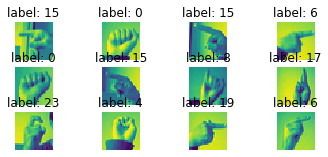

In [7]:
type(training_images)
images_and_labels = list(zip(training_images, training_labels))
for index, (image, label) in enumerate(images_and_labels[:12]):
  plt.subplot(5,4,index+1)
  plt.axis('off')
  plt.imshow(image, interpolation='nearest')
  plt.title('label: %i' % label)

In [8]:
# In this section you will have to add another dimension to the data
# So, for example, if your array is (10000, 28, 28)
# You will need to make it (10000, 28, 28, 1)
# Hint: np.expand_dims

training_images = training_images.reshape(-1,28,28,1)
testing_images = testing_images.reshape(-1,28,28,1)


# Keep These
print(training_images.shape)
print(testing_images.shape)
    
# Their output should be:
# (27455, 28, 28, 1)
# (7172, 28, 28, 1)

(27455, 28, 28, 1)
(7172, 28, 28, 1)


In [9]:
training_labels = tf.keras.utils.to_categorical(training_labels)

In [10]:
print(training_labels)
print(training_labels.shape)

[[0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
(27455, 25)


In [146]:
# Define the model
# Use no more than 2 Conv2D and 2 MaxPooling2D
model = tf.keras.models.Sequential([
     # Note the input shape is the desired size of the image 150x150 with 3 bytes color
    # This is the first convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(150, 150, 1)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The third convolution
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fourth convolution
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')   
])

In [11]:
model = Sequential()
# The first layer doesn't have significant importance in the code.
# THe conv layer is used only to get the 3d images from the fit generator in the 2d format and flatten it using flatten layer
# THe layer will not affect the layer since i am only using feature Pooling _ 1*1 convolution with only 1 feature map
model.add(Conv2D(1, kernel_size=1, padding="same",input_shape=(28, 28, 1), activation = 'relu'))
model.add(Flatten())

# model.add(Dense(units=800, activation='relu', input_dim= 784 ,  kernel_regularizer=regularizers.l2(0.001) ) )

model.add(Dense(units=100, activation='relu'  ))
model.add(Dropout(0.1))
model.add(Dense(units=100, activation='relu'  ))
model.add(Dropout(0.1))
model.add(Dense(units=100, activation='relu'  ))
model.add(Dropout(0.1))

#and now the output layer which will have 10 units to
#output a 1-hot vector to detect one of the 10 classes
model.add(Dense(units=10, activation='softmax'))

In [12]:
# Compile model
model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

In [13]:
training_images2 = np.array(training_images, copy=True)
training_labels2 = np.array(training_labels, copy=True)

# Create an ImageDataGenerator and do Image Augmentation
train_datagen = ImageDataGenerator(
    rescale = 1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split=0.2
  )

validation_datagen = ImageDataGenerator(
    rescale=1./255)
    
train_datagen.fit(training_images)
print(type(training_images))

<class 'numpy.ndarray'>


In [14]:
testing_labels = tf.keras.utils.to_categorical(testing_labels)
testing_images2 = np.array(testing_images, copy=True)
testing_labels2 = np.array(testing_labels, copy=True)

earlystopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0, patience=30, verbose=0, mode='min')

training_generator = train_datagen.flow(training_images2, training_labels2, batch_size=60, subset='training')
validation_generator = train_datagen.flow(training_images2, training_labels2, batch_size=60, subset='validation')

In [15]:


# Train the Model
history = model.fit(training_generator,
                              validation_data=validation_generator,
                              steps_per_epoch=len(training_generator)//20,
                              validation_steps=len(validation_generator)//20,
                              epochs=20,
                              callbacks=[earlystopping])

model.evaluate(testing_images, testing_labels)
    
# The output from model.evaluate should be close to:
[6.92426086682151, 0.56609035]


Epoch 1/20


InvalidArgumentError: ignored

In [ ]:
# Plot the chart for accuracy and loss on both training and validation

import matplotlib.pyplot as plt
acc = # Your Code Here
val_acc = # Your Code Here
loss = # Your Code Here
val_loss = # Your Code Here

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()